In [4]:
import numpy as np
import csv
import math
import pandas as pd
from hmmlearn import hmm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import homogeneity_score, completeness_score, \
v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
import matplotlib.pyplot as plt


In [5]:
import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from IPython.display import display
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA

In [6]:
with open('OrdonezA_Description.txt', 'r') as A:
    lines = A.readlines()
states=[]
items = []
data=[]
for line in lines:
    item = line.split()
    item=','.join(map(str, item))
    data.append(item)
    items.append(item)
data

['=============================',
 'OrdonezA,DATASET,DESCRIPTION',
 '=============================',
 '',
 'Home,setting:,4,rooms,house',
 'Number,of,labelled,days:,14,days',
 'Labels,(ADLs,included):,Leaving,,Toileting,,Showering,,Sleeping,,Breakfast,,Lunch,,Dinner,,Snack,,Spare_Time/TV,,Grooming',
 'Number,of,sensors:,12,sensors',
 'Sensors:,PIR:,Shower,,Basin,,Cooktop',
 'Magnetic:,Maindoor,,Fridge,,Cabinet,,Cupboard',
 'Flush:,Toilet',
 'Pressure:,Seat,,Bed',
 'Electric:,Microwave,,Toaster']

In [7]:
data=[]
for y in items:
    y=y.split(',')
    data.append(y)
data


[['============================='],
 ['OrdonezA', 'DATASET', 'DESCRIPTION'],
 ['============================='],
 [''],
 ['Home', 'setting:', '4', 'rooms', 'house'],
 ['Number', 'of', 'labelled', 'days:', '14', 'days'],
 ['Labels',
  '(ADLs',
  'included):',
  'Leaving',
  '',
  'Toileting',
  '',
  'Showering',
  '',
  'Sleeping',
  '',
  'Breakfast',
  '',
  'Lunch',
  '',
  'Dinner',
  '',
  'Snack',
  '',
  'Spare_Time/TV',
  '',
  'Grooming'],
 ['Number', 'of', 'sensors:', '12', 'sensors'],
 ['Sensors:', 'PIR:', 'Shower', '', 'Basin', '', 'Cooktop'],
 ['Magnetic:', 'Maindoor', '', 'Fridge', '', 'Cabinet', '', 'Cupboard'],
 ['Flush:', 'Toilet'],
 ['Pressure:', 'Seat', '', 'Bed'],
 ['Electric:', 'Microwave', '', 'Toaster']]

In [8]:
dfseries=[]
for y in data:
    out=pd.Series(y)
    dfseries.append(out)
dfseries 

[0    =============================
 dtype: object,
 0       OrdonezA
 1        DATASET
 2    DESCRIPTION
 dtype: object,
 0    =============================
 dtype: object,
 0    
 dtype: object,
 0        Home
 1    setting:
 2           4
 3       rooms
 4       house
 dtype: object,
 0      Number
 1          of
 2    labelled
 3       days:
 4          14
 5        days
 dtype: object,
 0            Labels
 1             (ADLs
 2        included):
 3           Leaving
 4                  
 5         Toileting
 6                  
 7         Showering
 8                  
 9          Sleeping
 10                 
 11        Breakfast
 12                 
 13            Lunch
 14                 
 15           Dinner
 16                 
 17            Snack
 18                 
 19    Spare_Time/TV
 20                 
 21         Grooming
 dtype: object,
 0      Number
 1          of
 2    sensors:
 3          12
 4     sensors
 dtype: object,
 0    Sensors:
 1        PIR:
 2     

In [9]:
df = pd.concat(dfseries, axis=1)

df.to_csv('OrdonezA_Desc.csv', index=False)
Description_A=pd.read_csv('OrdonezA_Desc.csv')
Description_A

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,=============================,OrdonezA,=============================,NaN,Home,Number,Labels,Number,Sensors:,Magnetic:,Flush:,Pressure:,Electric:
1,NaN,DATASET,NaN,NaN,setting:,of,(ADLs,of,PIR:,Maindoor,Toilet,Seat,Microwave
2,NaN,DESCRIPTION,NaN,NaN,4,labelled,included):,sensors:,Shower,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,rooms,days:,Leaving,12,NaN,Fridge,NaN,Bed,Toaster
4,NaN,NaN,NaN,NaN,house,14,NaN,sensors,Basin,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,days,Toileting,NaN,NaN,Cabinet,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cooktop,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,Showering,NaN,NaN,Cupboard,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,Sleeping,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
with open('OrdonezB_Description.txt', 'r') as A:
    lines = A.readlines()
states=[]
items = []
data=[]
for line in lines:
    item = line.split()
    item=','.join(map(str, item))
    data.append(item)
    items.append(item)
data

['=============================',
 'OrdonezB,DATASET,DESCRIPTION',
 '=============================',
 'Home,setting:,5,rooms,house',
 'Number,of,labelled,days:,21,days',
 'Labels,(ADLs,included):,Leaving,,Toileting,,Showering,,Sleeping,,Breakfast,,Lunch,,Dinner,,Snack,,Spare_Time/TV,,Grooming',
 'Number,of,sensors:,12,sensors',
 'Sensors:,PIR:,Shower,,Basin,,Door,Kitchen,,Door,Bathroom,,Door,Bedroom',
 'Magnetic:,Maindoor,,Fridge,,Cupboard',
 'Flush:,Toilet',
 'Pressure:,Seat,,Bed',
 'Electric:,Microwave']

In [11]:
data=[]
for y in items:
    y=y.split(',')
    data.append(y)
data

[['============================='],
 ['OrdonezB', 'DATASET', 'DESCRIPTION'],
 ['============================='],
 ['Home', 'setting:', '5', 'rooms', 'house'],
 ['Number', 'of', 'labelled', 'days:', '21', 'days'],
 ['Labels',
  '(ADLs',
  'included):',
  'Leaving',
  '',
  'Toileting',
  '',
  'Showering',
  '',
  'Sleeping',
  '',
  'Breakfast',
  '',
  'Lunch',
  '',
  'Dinner',
  '',
  'Snack',
  '',
  'Spare_Time/TV',
  '',
  'Grooming'],
 ['Number', 'of', 'sensors:', '12', 'sensors'],
 ['Sensors:',
  'PIR:',
  'Shower',
  '',
  'Basin',
  '',
  'Door',
  'Kitchen',
  '',
  'Door',
  'Bathroom',
  '',
  'Door',
  'Bedroom'],
 ['Magnetic:', 'Maindoor', '', 'Fridge', '', 'Cupboard'],
 ['Flush:', 'Toilet'],
 ['Pressure:', 'Seat', '', 'Bed'],
 ['Electric:', 'Microwave']]

In [12]:
dfseries=[]
for y in data:
    out=pd.Series(y)
    dfseries.append(out)
dfseries  

[0    =============================
 dtype: object,
 0       OrdonezB
 1        DATASET
 2    DESCRIPTION
 dtype: object,
 0    =============================
 dtype: object,
 0        Home
 1    setting:
 2           5
 3       rooms
 4       house
 dtype: object,
 0      Number
 1          of
 2    labelled
 3       days:
 4          21
 5        days
 dtype: object,
 0            Labels
 1             (ADLs
 2        included):
 3           Leaving
 4                  
 5         Toileting
 6                  
 7         Showering
 8                  
 9          Sleeping
 10                 
 11        Breakfast
 12                 
 13            Lunch
 14                 
 15           Dinner
 16                 
 17            Snack
 18                 
 19    Spare_Time/TV
 20                 
 21         Grooming
 dtype: object,
 0      Number
 1          of
 2    sensors:
 3          12
 4     sensors
 dtype: object,
 0     Sensors:
 1         PIR:
 2       Shower
 3          

In [13]:
df = pd.concat(dfseries, axis=1)
df.to_csv('OrdonezB_Desc.csv', index=False)
Description_B=pd.read_csv('OrdonezB_Desc.csv')
Description_B

,0,1,2,3,4,5,6,7,8,9,10,11
0,=============================,OrdonezB,=============================,Home,Number,Labels,Number,Sensors:,Magnetic:,Flush:,Pressure:,Electric:
1,NaN,DATASET,NaN,setting:,of,(ADLs,of,PIR:,Maindoor,Toilet,Seat,Microwave
2,NaN,DESCRIPTION,NaN,5,labelled,included):,sensors:,Shower,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,rooms,days:,Leaving,12,NaN,Fridge,NaN,Bed,NaN
4,NaN,NaN,NaN,house,21,NaN,sensors,Basin,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,days,Toileting,NaN,NaN,Cupboard,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Door,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,Showering,NaN,Kitchen,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,Sleeping,NaN,Door,NaN,NaN,NaN,NaN


In [14]:
with open('OrdonezA_Sensors.txt', 'r') as A:
    lines = A.readlines()
states=[]
items = []
data=[]
for line in lines:
    item = line.split()
    item=','.join(map(str, item))
    data.append(item)
    items.append(item)
data

['Start,time,End,time,Location,Type,Place',
 '--------------------,--------------------,--------,--------,-----',
 '2011-11-28,02:27:59,2011-11-28,10:18:11,Bed,Pressure,Bedroom',
 '2011-11-28,10:21:24,2011-11-28,10:21:31,Cabinet,Magnetic,Bathroom',
 '2011-11-28,10:21:44,2011-11-28,10:23:31,Basin,PIR,Bathroom',
 '2011-11-28,10:23:02,2011-11-28,10:23:36,Toilet,Flush,Bathroom',
 '2011-11-28,10:25:44,2011-11-28,10:32:06,Shower,PIR,Bathroom',
 '2011-11-28,10:34:23,2011-11-28,10:34:41,Fridge,Magnetic,Kitchen',
 '2011-11-28,10:34:44,2011-11-28,10:37:17,Cupboard,Magnetic,Kitchen',
 '2011-11-28,10:38:00,2011-11-28,10:42:41,Toaster,Electric,Kitchen',
 '2011-11-28,10:38:33,2011-11-28,10:38:40,Fridge,Magnetic,Kitchen',
 '2011-11-28,10:41:29,2011-11-28,10:41:36,Cupboard,Magnetic,Kitchen',
 '2011-11-28,10:41:43,2011-11-28,10:41:59,Cooktop,PIR,Kitchen',
 '2011-11-28,10:41:59,2011-11-28,10:42:55,Microwave,Electric,Kitchen',
 '2011-11-28,10:49:48,2011-11-28,10:51:13,Basin,PIR,Bathroom',
 '2011-11-28,10

In [15]:
data=[]
for x in items:
    x=x.split(',')
    data.append(x)
data

[['Start', 'time', 'End', 'time', 'Location', 'Type', 'Place'],
 ['--------------------',
  '--------------------',
  '--------',
  '--------',
  '-----'],
 ['2011-11-28',
  '02:27:59',
  '2011-11-28',
  '10:18:11',
  'Bed',
  'Pressure',
  'Bedroom'],
 ['2011-11-28',
  '10:21:24',
  '2011-11-28',
  '10:21:31',
  'Cabinet',
  'Magnetic',
  'Bathroom'],
 ['2011-11-28',
  '10:21:44',
  '2011-11-28',
  '10:23:31',
  'Basin',
  'PIR',
  'Bathroom'],
 ['2011-11-28',
  '10:23:02',
  '2011-11-28',
  '10:23:36',
  'Toilet',
  'Flush',
  'Bathroom'],
 ['2011-11-28',
  '10:25:44',
  '2011-11-28',
  '10:32:06',
  'Shower',
  'PIR',
  'Bathroom'],
 ['2011-11-28',
  '10:34:23',
  '2011-11-28',
  '10:34:41',
  'Fridge',
  'Magnetic',
  'Kitchen'],
 ['2011-11-28',
  '10:34:44',
  '2011-11-28',
  '10:37:17',
  'Cupboard',
  'Magnetic',
  'Kitchen'],
 ['2011-11-28',
  '10:38:00',
  '2011-11-28',
  '10:42:41',
  'Toaster',
  'Electric',
  'Kitchen'],
 ['2011-11-28',
  '10:38:33',
  '2011-11-28',
  '10:3

In [16]:
dfseries=[]
for x in data:
    out=pd.Series(x)
    dfseries.append(out)
dfseries  

[0       Start
 1        time
 2         End
 3        time
 4    Location
 5        Type
 6       Place
 dtype: object,
 0    --------------------
 1    --------------------
 2                --------
 3                --------
 4                   -----
 dtype: object,
 0    2011-11-28
 1      02:27:59
 2    2011-11-28
 3      10:18:11
 4           Bed
 5      Pressure
 6       Bedroom
 dtype: object,
 0    2011-11-28
 1      10:21:24
 2    2011-11-28
 3      10:21:31
 4       Cabinet
 5      Magnetic
 6      Bathroom
 dtype: object,
 0    2011-11-28
 1      10:21:44
 2    2011-11-28
 3      10:23:31
 4         Basin
 5           PIR
 6      Bathroom
 dtype: object,
 0    2011-11-28
 1      10:23:02
 2    2011-11-28
 3      10:23:36
 4        Toilet
 5         Flush
 6      Bathroom
 dtype: object,
 0    2011-11-28
 1      10:25:44
 2    2011-11-28
 3      10:32:06
 4        Shower
 5           PIR
 6      Bathroom
 dtype: object,
 0    2011-11-28
 1      10:34:23
 2    2011-11-28
 3

In [17]:
df = pd.concat(dfseries, axis=1)
df.to_csv('OrdonezA_Sen.csv', index=False)
SensorsA=pd.read_csv('OrdonezA_Sen.csv')
SensorsA

,0,1,2,3,4,5,6,7,8,9,...,401,402,403,404,405,406,407,408,409,410
0,Start,--------------------,2011-11-28,2011-11-28,2011-11-28,2011-11-28,2011-11-28,2011-11-28,2011-11-28,2011-11-28,...,2011-12-11,2011-12-11,2011-12-11,2011-12-11,2011-12-11,2011-12-11,2011-12-11,2011-12-11,2011-12-11,2011-12-12
1,time,--------------------,02:27:59,10:21:24,10:21:44,10:23:02,10:25:44,10:34:23,10:34:44,10:38:00,...,14:34:12,14:36:58,14:37:04,14:43:05,14:49:47,15:13:52,15:29:03,15:41:34,15:43:51,00:31:35
2,End,--------,2011-11-28,2011-11-28,2011-11-28,2011-11-28,2011-11-28,2011-11-28,2011-11-28,2011-11-28,...,2011-12-11,2011-12-11,2011-12-11,2011-12-11,2011-12-11,2011-12-11,2011-12-11,2011-12-11,2011-12-12,2011-12-12
3,time,--------,10:18:11,10:21:31,10:23:31,10:23:36,10:32:06,10:34:41,10:37:17,10:42:41,...,14:34:59,15:00:37,14:37:14,14:44:23,14:50:02,15:13:57,15:30:14,15:43:30,00:22:50,07:22:21
4,Location,-----,Bed,Cabinet,Basin,Toilet,Shower,Fridge,Cupboard,Toaster,...,Cupboard,Cooktop,Cupboard,Cupboard,Cupboard,Fridge,Toilet,Basin,Seat,Bed
5,Type,NaN,Pressure,Magnetic,PIR,Flush,PIR,Magnetic,Magnetic,Electric,...,Magnetic,PIR,Magnetic,Magnetic,Magnetic,Magnetic,Flush,PIR,Pressure,Pressure
6,Place,NaN,Bedroom,Bathroom,Bathroom,Bathroom,Bathroom,Kitchen,Kitchen,Kitchen,...,Kitchen,Kitchen,Kitchen,Kitchen,Kitchen,Kitchen,Bathroom,Bathroom,Living,Bedroom


In [18]:
OrdonezASensors=SensorsA.transpose()
OrdonezASensors

,0,1,2,3,4,5,6
0,Start,time,End,time,Location,Type,Place
1,--------------------,--------------------,--------,--------,-----,NaN,NaN
2,2011-11-28,02:27:59,2011-11-28,10:18:11,Bed,Pressure,Bedroom
3,2011-11-28,10:21:24,2011-11-28,10:21:31,Cabinet,Magnetic,Bathroom
4,2011-11-28,10:21:44,2011-11-28,10:23:31,Basin,PIR,Bathroom
...,...,...,...,...,...,...,...
406,2011-12-11,15:13:52,2011-12-11,15:13:57,Fridge,Magnetic,Kitchen
407,2011-12-11,15:29:03,2011-12-11,15:30:14,Toilet,Flush,Bathroom
408,2011-12-11,15:41:34,2011-12-11,15:43:30,Basin,PIR,Bathroom
409,2011-12-11,15:43:51,2011-12-12,00:22:50,Seat,Pressure,Living


In [19]:
with open('OrdonezB_Sensors.txt', 'r') as A:
    lines = A.readlines()
states=[]
items = []
data=[]
for line in lines:
    item = line.split()
    item=','.join(map(str, item))
    data.append(item)
    items.append(item)
data

['Start,time,End,time,Location,Type,Place',
 '--------------------,--------------------,--------,--------,-----',
 '2012-11-11,21:14:21,2012-11-12,00:21:49,Seat,Pressure,Living',
 '2012-11-12,00:22:57,2012-11-12,00:22:59,Door,PIR,Living',
 '2012-11-12,00:23:14,2012-11-12,00:23:17,Door,PIR,Kitchen',
 '2012-11-12,00:24:20,2012-11-12,00:24:22,Door,PIR,Kitchen',
 '2012-11-12,00:24:42,2012-11-12,00:24:54,Door,PIR,Living',
 '2012-11-12,00:25:35,2012-11-12,00:42:56,Seat,Pressure,Living',
 '2012-11-12,00:43:46,2012-11-12,00:43:49,Door,PIR,Living',
 '2012-11-12,00:46:12,2012-11-12,00:46:15,Door,PIR,Bedroom',
 '2012-11-12,00:47:21,2012-11-12,00:47:24,Door,PIR,Bedroom',
 '2012-11-12,00:48:38,2012-11-12,00:50:12,Basin,PIR,Bathroom',
 '2012-11-12,00:50:29,2012-11-12,00:50:32,Door,PIR,Living',
 '2012-11-12,00:51:18,2012-11-12,01:52:12,Seat,Pressure,Living',
 '2012-11-12,01:53:19,2012-11-12,01:53:22,Door,PIR,Living',
 '2012-11-12,01:53:27,2012-11-12,01:53:35,Basin,PIR,Bathroom',
 '2012-11-12,01:53:39

In [20]:
data=[]
for x in items:
    x=x.split(',')
    data.append(x)
data



[['Start', 'time', 'End', 'time', 'Location', 'Type', 'Place'],
 ['--------------------',
  '--------------------',
  '--------',
  '--------',
  '-----'],
 ['2012-11-11',
  '21:14:21',
  '2012-11-12',
  '00:21:49',
  'Seat',
  'Pressure',
  'Living'],
 ['2012-11-12', '00:22:57', '2012-11-12', '00:22:59', 'Door', 'PIR', 'Living'],
 ['2012-11-12',
  '00:23:14',
  '2012-11-12',
  '00:23:17',
  'Door',
  'PIR',
  'Kitchen'],
 ['2012-11-12',
  '00:24:20',
  '2012-11-12',
  '00:24:22',
  'Door',
  'PIR',
  'Kitchen'],
 ['2012-11-12', '00:24:42', '2012-11-12', '00:24:54', 'Door', 'PIR', 'Living'],
 ['2012-11-12',
  '00:25:35',
  '2012-11-12',
  '00:42:56',
  'Seat',
  'Pressure',
  'Living'],
 ['2012-11-12', '00:43:46', '2012-11-12', '00:43:49', 'Door', 'PIR', 'Living'],
 ['2012-11-12',
  '00:46:12',
  '2012-11-12',
  '00:46:15',
  'Door',
  'PIR',
  'Bedroom'],
 ['2012-11-12',
  '00:47:21',
  '2012-11-12',
  '00:47:24',
  'Door',
  'PIR',
  'Bedroom'],
 ['2012-11-12',
  '00:48:38',
  '2012-

In [21]:
dfseries=[]
for x in data:
    out=pd.Series(x)
    dfseries.append(out)
dfseries  

[0       Start
 1        time
 2         End
 3        time
 4    Location
 5        Type
 6       Place
 dtype: object,
 0    --------------------
 1    --------------------
 2                --------
 3                --------
 4                   -----
 dtype: object,
 0    2012-11-11
 1      21:14:21
 2    2012-11-12
 3      00:21:49
 4          Seat
 5      Pressure
 6        Living
 dtype: object,
 0    2012-11-12
 1      00:22:57
 2    2012-11-12
 3      00:22:59
 4          Door
 5           PIR
 6        Living
 dtype: object,
 0    2012-11-12
 1      00:23:14
 2    2012-11-12
 3      00:23:17
 4          Door
 5           PIR
 6       Kitchen
 dtype: object,
 0    2012-11-12
 1      00:24:20
 2    2012-11-12
 3      00:24:22
 4          Door
 5           PIR
 6       Kitchen
 dtype: object,
 0    2012-11-12
 1      00:24:42
 2    2012-11-12
 3      00:24:54
 4          Door
 5           PIR
 6        Living
 dtype: object,
 0    2012-11-12
 1      00:25:35
 2    2012-11-12
 3

In [22]:
df = pd.concat(dfseries, axis=1)
df.to_csv('OrdonezB_Sen.csv', index=False)
SensorsB=pd.read_csv('OrdonezB_Sen.csv')
SensorsB

,0,1,2,3,4,5,6,7,8,9,...,2326,2327,2328,2329,2330,2331,2332,2333,2334,2335
0,Start,--------------------,2012-11-11,2012-11-12,2012-11-12,2012-11-12,2012-11-12,2012-11-12,2012-11-12,2012-11-12,...,2012-12-02,2012-12-02,2012-12-02,2012-12-02,2012-12-02,2012-12-02,2012-12-02,2012-12-02,2012-12-02,2012-12-02
1,time,--------------------,21:14:21,00:22:57,00:23:14,00:24:20,00:24:42,00:25:35,00:43:46,00:46:12,...,20:21:43,20:28:42,20:29:11,20:29:33,20:39:12,20:41:25,20:41:44,21:18:10,21:18:28,21:19:12
2,End,--------,2012-11-12,2012-11-12,2012-11-12,2012-11-12,2012-11-12,2012-11-12,2012-11-12,2012-11-12,...,2012-12-02,2012-12-02,2012-12-02,2012-12-02,2012-12-02,2012-12-02,2012-12-02,2012-12-02,2012-12-02,2012-12-03
3,time,--------,00:21:49,00:22:59,00:23:17,00:24:22,00:24:54,00:42:56,00:43:49,00:46:15,...,20:21:46,20:28:51,20:29:15,20:29:37,20:39:20,20:41:34,20:41:47,21:18:13,21:18:31,01:03:12
4,Location,-----,Seat,Door,Door,Door,Door,Seat,Door,Door,...,Door,Door,Door,Basin,Door,Door,Door,Door,Door,Seat
5,Type,NaN,Pressure,PIR,PIR,PIR,PIR,Pressure,PIR,PIR,...,PIR,PIR,PIR,PIR,PIR,PIR,PIR,PIR,PIR,Pressure
6,Place,NaN,Living,Living,Kitchen,Kitchen,Living,Living,Living,Bedroom,...,Living,Bedroom,Bedroom,Bathroom,Bedroom,Bedroom,Living,Living,Living,Living


In [23]:
OrdonezBSensors=SensorsB.transpose()
OrdonezBSensors

,0,1,2,3,4,5,6
0,Start,time,End,time,Location,Type,Place
1,--------------------,--------------------,--------,--------,-----,NaN,NaN
2,2012-11-11,21:14:21,2012-11-12,00:21:49,Seat,Pressure,Living
3,2012-11-12,00:22:57,2012-11-12,00:22:59,Door,PIR,Living
4,2012-11-12,00:23:14,2012-11-12,00:23:17,Door,PIR,Kitchen
...,...,...,...,...,...,...,...
2331,2012-12-02,20:41:25,2012-12-02,20:41:34,Door,PIR,Bedroom
2332,2012-12-02,20:41:44,2012-12-02,20:41:47,Door,PIR,Living
2333,2012-12-02,21:18:10,2012-12-02,21:18:13,Door,PIR,Living
2334,2012-12-02,21:18:28,2012-12-02,21:18:31,Door,PIR,Living


In [24]:
AB_Sensors = pd.concat([OrdonezASensors, OrdonezBSensors])
AB_Sensors

,0,1,2,3,4,5,6
0,Start,time,End,time,Location,Type,Place
1,--------------------,--------------------,--------,--------,-----,NaN,NaN
2,2011-11-28,02:27:59,2011-11-28,10:18:11,Bed,Pressure,Bedroom
3,2011-11-28,10:21:24,2011-11-28,10:21:31,Cabinet,Magnetic,Bathroom
4,2011-11-28,10:21:44,2011-11-28,10:23:31,Basin,PIR,Bathroom
...,...,...,...,...,...,...,...
2331,2012-12-02,20:41:25,2012-12-02,20:41:34,Door,PIR,Bedroom
2332,2012-12-02,20:41:44,2012-12-02,20:41:47,Door,PIR,Living
2333,2012-12-02,21:18:10,2012-12-02,21:18:13,Door,PIR,Living
2334,2012-12-02,21:18:28,2012-12-02,21:18:31,Door,PIR,Living


In [25]:
with open('OrdonezA_ADLs.txt', 'r') as f:
    lines = f.readlines()
states=[]
items = []
data=[]
for line in lines:
    item = line.split()
    item=','.join(map(str, item))
    data.append(item)
    items.append(item)
data

['Start,time,End,time,Activity',
 '--------------------,--------------------,--------',
 '2011-11-28,02:27:59,2011-11-28,10:18:11,Sleeping',
 '2011-11-28,10:21:24,2011-11-28,10:23:36,Toileting',
 '2011-11-28,10:25:44,2011-11-28,10:33:00,Showering',
 '2011-11-28,10:34:23,2011-11-28,10:43:00,Breakfast',
 '2011-11-28,10:49:48,2011-11-28,10:51:13,Grooming',
 '2011-11-28,10:51:41,2011-11-28,13:05:07,Spare_Time/TV',
 '2011-11-28,13:06:04,2011-11-28,13:06:31,Toileting',
 '2011-11-28,13:09:31,2011-11-28,13:29:09,Leaving',
 '2011-11-28,13:38:40,2011-11-28,14:21:40,Spare_Time/TV',
 '2011-11-28,14:22:38,2011-11-28,14:27:07,Toileting',
 '2011-11-28,14:27:11,2011-11-28,15:04:00,Lunch',
 '2011-11-28,15:04:59,2011-11-28,15:06:29,Grooming',
 '2011-11-28,15:07:01,2011-11-28,20:20:00,Spare_Time/TV',
 '2011-11-28,20:20:55,2011-11-28,20:20:59,Snack',
 '2011-11-28,20:21:15,2011-11-29,02:06:00,Spare_Time/TV',
 '2011-11-29,02:16:00,2011-11-29,11:31:00,Sleeping',
 '2011-11-29,11:31:55,2011-11-29,11:36:55,Toil

In [26]:
data=[]
for x in items:
    x=x.split(',')
    data.append(x)
data

[['Start', 'time', 'End', 'time', 'Activity'],
 ['--------------------', '--------------------', '--------'],
 ['2011-11-28', '02:27:59', '2011-11-28', '10:18:11', 'Sleeping'],
 ['2011-11-28', '10:21:24', '2011-11-28', '10:23:36', 'Toileting'],
 ['2011-11-28', '10:25:44', '2011-11-28', '10:33:00', 'Showering'],
 ['2011-11-28', '10:34:23', '2011-11-28', '10:43:00', 'Breakfast'],
 ['2011-11-28', '10:49:48', '2011-11-28', '10:51:13', 'Grooming'],
 ['2011-11-28', '10:51:41', '2011-11-28', '13:05:07', 'Spare_Time/TV'],
 ['2011-11-28', '13:06:04', '2011-11-28', '13:06:31', 'Toileting'],
 ['2011-11-28', '13:09:31', '2011-11-28', '13:29:09', 'Leaving'],
 ['2011-11-28', '13:38:40', '2011-11-28', '14:21:40', 'Spare_Time/TV'],
 ['2011-11-28', '14:22:38', '2011-11-28', '14:27:07', 'Toileting'],
 ['2011-11-28', '14:27:11', '2011-11-28', '15:04:00', 'Lunch'],
 ['2011-11-28', '15:04:59', '2011-11-28', '15:06:29', 'Grooming'],
 ['2011-11-28', '15:07:01', '2011-11-28', '20:20:00', 'Spare_Time/TV'],
 ['

In [27]:
dfseries=[]
for x in data:
    out=pd.Series(x)
    dfseries.append(out)
dfseries  

[0       Start
 1        time
 2         End
 3        time
 4    Activity
 dtype: object,
 0    --------------------
 1    --------------------
 2                --------
 dtype: object,
 0    2011-11-28
 1      02:27:59
 2    2011-11-28
 3      10:18:11
 4      Sleeping
 dtype: object,
 0    2011-11-28
 1      10:21:24
 2    2011-11-28
 3      10:23:36
 4     Toileting
 dtype: object,
 0    2011-11-28
 1      10:25:44
 2    2011-11-28
 3      10:33:00
 4     Showering
 dtype: object,
 0    2011-11-28
 1      10:34:23
 2    2011-11-28
 3      10:43:00
 4     Breakfast
 dtype: object,
 0    2011-11-28
 1      10:49:48
 2    2011-11-28
 3      10:51:13
 4      Grooming
 dtype: object,
 0       2011-11-28
 1         10:51:41
 2       2011-11-28
 3         13:05:07
 4    Spare_Time/TV
 dtype: object,
 0    2011-11-28
 1      13:06:04
 2    2011-11-28
 3      13:06:31
 4     Toileting
 dtype: object,
 0    2011-11-28
 1      13:09:31
 2    2011-11-28
 3      13:29:09
 4       Leaving
 dtyp

In [28]:
df = pd.concat(dfseries, axis=1)

df.to_csv('OrdonezA_ADL.csv', index=False)
A_ADL=pd.read_csv('OrdonezA_ADL.csv')
A_ADL

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,Start,--------------------,2011-11-28,2011-11-28,2011-11-28,2011-11-28,2011-11-28,2011-11-28,2011-11-28,2011-11-28,...,2011-12-11,2011-12-11,2011-12-11,2011-12-11,2011-12-11,2011-12-11,2011-12-11,2011-12-11,2011-12-11,2011-12-11
1,time,--------------------,02:27:59,10:21:24,10:25:44,10:34:23,10:49:48,10:51:41,13:06:04,13:09:31,...,02:31:15,11:58:17,12:02:25,12:02:56,12:21:57,12:32:49,14:34:12,15:28:59,15:41:34,15:43:51
2,End,--------,2011-11-28,2011-11-28,2011-11-28,2011-11-28,2011-11-28,2011-11-28,2011-11-28,2011-11-28,...,2011-12-11,2011-12-11,2011-12-11,2011-12-11,2011-12-11,2011-12-11,2011-12-11,2011-12-11,2011-12-11,2011-12-11
3,time,NaN,10:18:11,10:23:36,10:33:00,10:43:00,10:51:13,13:05:07,13:06:31,13:29:09,...,11:57:34,12:01:27,12:02:39,12:18:42,12:30:09,14:26:18,15:26:17,15:30:14,15:43:30,21:41:48
4,Activity,NaN,Sleeping,Toileting,Showering,Breakfast,Grooming,Spare_Time/TV,Toileting,Leaving,...,Sleeping,Toileting,Grooming,Showering,Breakfast,Spare_Time/TV,Lunch,Toileting,Grooming,Spare_Time/TV


In [29]:
A_ADLTranspose=A_ADL.transpose()
A_ADLTranspose

,0,1,2,3,4
0,Start,time,End,time,Activity
1,--------------------,--------------------,--------,NaN,NaN
2,2011-11-28,02:27:59,2011-11-28,10:18:11,Sleeping
3,2011-11-28,10:21:24,2011-11-28,10:23:36,Toileting
4,2011-11-28,10:25:44,2011-11-28,10:33:00,Showering
...,...,...,...,...,...
245,2011-12-11,12:32:49,2011-12-11,14:26:18,Spare_Time/TV
246,2011-12-11,14:34:12,2011-12-11,15:26:17,Lunch
247,2011-12-11,15:28:59,2011-12-11,15:30:14,Toileting
248,2011-12-11,15:41:34,2011-12-11,15:43:30,Grooming


In [30]:
with open('OrdonezB_ADLs.txt', 'r') as f:
    lines = f.readlines()
states=[]
items = []
data=[]
for line in lines:
    item = line.split()
    item=','.join(map(str, item))
    data.append(item)
    items.append(item)
data

['Start,time,End,time,Activity',
 '--------------------,--------------------,--------',
 '2012-11-11,21:14:00,2012-11-12,00:22:59,Spare_Time/TV',
 '2012-11-12,00:24:00,2012-11-12,00:43:59,Spare_Time/TV',
 '2012-11-12,00:48:00,2012-11-12,00:49:59,Grooming',
 '2012-11-12,00:50:00,2012-11-12,01:51:59,Spare_Time/TV',
 '2012-11-12,01:52:00,2012-11-12,01:52:59,Grooming',
 '2012-11-12,01:53:00,2012-11-12,01:53:59,Toileting',
 '2012-11-12,01:54:00,2012-11-12,09:31:59,Sleeping',
 '2012-11-12,09:37:00,2012-11-12,09:38:59,Toileting',
 '2012-11-12,09:42:00,2012-11-12,09:52:59,Breakfast',
 '2012-11-12,09:56:00,2012-11-12,10:15:59,Spare_Time/TV',
 '2012-11-12,10:18:00,2012-11-12,10:20:59,Grooming',
 '2012-11-12,10:21:00,2012-11-12,10:29:59,Showering',
 '2012-11-12,10:33:00,2012-11-12,10:34:59,Grooming',
 '2012-11-12,10:35:00,2012-11-12,10:35:59,Toileting',
 '2012-11-12,10:36:00,2012-11-12,10:40:59,Grooming',
 '2012-11-12,10:42:00,2012-11-12,10:42:59,Grooming',
 '2012-11-12,10:47:00,2012-11-12,11:04:

In [31]:
data=[]
for x in items:
    x=x.split(',')
    data.append(x)
data


[['Start', 'time', 'End', 'time', 'Activity'],
 ['--------------------', '--------------------', '--------'],
 ['2012-11-11', '21:14:00', '2012-11-12', '00:22:59', 'Spare_Time/TV'],
 ['2012-11-12', '00:24:00', '2012-11-12', '00:43:59', 'Spare_Time/TV'],
 ['2012-11-12', '00:48:00', '2012-11-12', '00:49:59', 'Grooming'],
 ['2012-11-12', '00:50:00', '2012-11-12', '01:51:59', 'Spare_Time/TV'],
 ['2012-11-12', '01:52:00', '2012-11-12', '01:52:59', 'Grooming'],
 ['2012-11-12', '01:53:00', '2012-11-12', '01:53:59', 'Toileting'],
 ['2012-11-12', '01:54:00', '2012-11-12', '09:31:59', 'Sleeping'],
 ['2012-11-12', '09:37:00', '2012-11-12', '09:38:59', 'Toileting'],
 ['2012-11-12', '09:42:00', '2012-11-12', '09:52:59', 'Breakfast'],
 ['2012-11-12', '09:56:00', '2012-11-12', '10:15:59', 'Spare_Time/TV'],
 ['2012-11-12', '10:18:00', '2012-11-12', '10:20:59', 'Grooming'],
 ['2012-11-12', '10:21:00', '2012-11-12', '10:29:59', 'Showering'],
 ['2012-11-12', '10:33:00', '2012-11-12', '10:34:59', 'Groomin

In [32]:
dfseries=[]
for x in data:
    out=pd.Series(x)
    dfseries.append(out)
dfseries  

[0       Start
 1        time
 2         End
 3        time
 4    Activity
 dtype: object,
 0    --------------------
 1    --------------------
 2                --------
 dtype: object,
 0       2012-11-11
 1         21:14:00
 2       2012-11-12
 3         00:22:59
 4    Spare_Time/TV
 dtype: object,
 0       2012-11-12
 1         00:24:00
 2       2012-11-12
 3         00:43:59
 4    Spare_Time/TV
 dtype: object,
 0    2012-11-12
 1      00:48:00
 2    2012-11-12
 3      00:49:59
 4      Grooming
 dtype: object,
 0       2012-11-12
 1         00:50:00
 2       2012-11-12
 3         01:51:59
 4    Spare_Time/TV
 dtype: object,
 0    2012-11-12
 1      01:52:00
 2    2012-11-12
 3      01:52:59
 4      Grooming
 dtype: object,
 0    2012-11-12
 1      01:53:00
 2    2012-11-12
 3      01:53:59
 4     Toileting
 dtype: object,
 0    2012-11-12
 1      01:54:00
 2    2012-11-12
 3      09:31:59
 4      Sleeping
 dtype: object,
 0    2012-11-12
 1      09:37:00
 2    2012-11-12
 3      0

In [33]:
df = pd.concat(dfseries, axis=1)

df.to_csv('OrdonezB_ADL.csv', index=False)
B_ADL=pd.read_csv('OrdonezB_ADL.csv')
B_ADL

,0,1,2,3,4,5,6,7,8,9,...,485,486,487,488,489,490,491,492,493,494
0,Start,--------------------,2012-11-11,2012-11-12,2012-11-12,2012-11-12,2012-11-12,2012-11-12,2012-11-12,2012-11-12,...,2012-12-02,2012-12-02,2012-12-02,2012-12-02,2012-12-02,2012-12-02,2012-12-02,2012-12-02,2012-12-02,2012-12-02
1,time,--------------------,21:14:00,00:24:00,00:48:00,00:50:00,01:52:00,01:53:00,01:54:00,09:37:00,...,13:37:00,15:14:00,16:45:00,17:10:00,18:46:00,19:10:00,19:16:00,20:09:00,20:29:00,20:41:00
2,End,--------,2012-11-12,2012-11-12,2012-11-12,2012-11-12,2012-11-12,2012-11-12,2012-11-12,2012-11-12,...,2012-12-02,2012-12-02,2012-12-02,2012-12-02,2012-12-02,2012-12-02,2012-12-02,2012-12-02,2012-12-02,2012-12-03
3,time,NaN,00:22:59,00:43:59,00:49:59,01:51:59,01:52:59,01:53:59,09:31:59,09:38:59,...,13:59:59,15:33:59,16:59:59,18:45:59,18:47:59,19:11:59,20:03:59,20:21:59,20:29:59,01:03:59
4,Activity,NaN,Spare_Time/TV,Spare_Time/TV,Grooming,Spare_Time/TV,Grooming,Toileting,Sleeping,Toileting,...,Leaving,Lunch,Snack,Spare_Time/TV,Toileting,Toileting,Spare_Time/TV,Spare_Time/TV,Grooming,Spare_Time/TV


In [34]:
B_ADLTranspose=B_ADL.transpose()
B_ADLTranspose

,0,1,2,3,4
0,Start,time,End,time,Activity
1,--------------------,--------------------,--------,NaN,NaN
2,2012-11-11,21:14:00,2012-11-12,00:22:59,Spare_Time/TV
3,2012-11-12,00:24:00,2012-11-12,00:43:59,Spare_Time/TV
4,2012-11-12,00:48:00,2012-11-12,00:49:59,Grooming
...,...,...,...,...,...
490,2012-12-02,19:10:00,2012-12-02,19:11:59,Toileting
491,2012-12-02,19:16:00,2012-12-02,20:03:59,Spare_Time/TV
492,2012-12-02,20:09:00,2012-12-02,20:21:59,Spare_Time/TV
493,2012-12-02,20:29:00,2012-12-02,20:29:59,Grooming


In [35]:
AB_ADL = pd.concat([A_ADLTranspose, B_ADLTranspose])
AB_ADL

,0,1,2,3,4
0,Start,time,End,time,Activity
1,--------------------,--------------------,--------,NaN,NaN
2,2011-11-28,02:27:59,2011-11-28,10:18:11,Sleeping
3,2011-11-28,10:21:24,2011-11-28,10:23:36,Toileting
4,2011-11-28,10:25:44,2011-11-28,10:33:00,Showering
...,...,...,...,...,...
490,2012-12-02,19:10:00,2012-12-02,19:11:59,Toileting
491,2012-12-02,19:16:00,2012-12-02,20:03:59,Spare_Time/TV
492,2012-12-02,20:09:00,2012-12-02,20:21:59,Spare_Time/TV
493,2012-12-02,20:29:00,2012-12-02,20:29:59,Grooming


In [36]:
AB_Sensors

,0,1,2,3,4,5,6
0,Start,time,End,time,Location,Type,Place
1,--------------------,--------------------,--------,--------,-----,NaN,NaN
2,2011-11-28,02:27:59,2011-11-28,10:18:11,Bed,Pressure,Bedroom
3,2011-11-28,10:21:24,2011-11-28,10:21:31,Cabinet,Magnetic,Bathroom
4,2011-11-28,10:21:44,2011-11-28,10:23:31,Basin,PIR,Bathroom
...,...,...,...,...,...,...,...
2331,2012-12-02,20:41:25,2012-12-02,20:41:34,Door,PIR,Bedroom
2332,2012-12-02,20:41:44,2012-12-02,20:41:47,Door,PIR,Living
2333,2012-12-02,21:18:10,2012-12-02,21:18:13,Door,PIR,Living
2334,2012-12-02,21:18:28,2012-12-02,21:18:31,Door,PIR,Living


In [37]:
header = AB_Sensors.columns.tolist()
print("Header: ", header)

Header:  [0, 1, 2, 3, 4, 5, 6]


In [38]:
AB_Sensors['Start_time']= AB_Sensors[0]+' '+AB_Sensors[1]
AB_Sensors['End_time']= AB_Sensors[2]+' '+AB_Sensors[3]
AB_Sensors['Location']= AB_Sensors[4]
AB_Sensors['Type']= AB_Sensors[5]
AB_Sensors['Place']= AB_Sensors[6]
#
Sensor=AB_Sensors.drop([0,1,2,3,4,5,6],axis = 1)
Sensor

#
sensor_Drop= Sensor.dropna() # Get the index of the row where column value is equal to value_to_find
sensor_Drop

,Start_time,End_time,Location,Type,Place
0,Start time,End time,Location,Type,Place
2,2011-11-28 02:27:59,2011-11-28 10:18:11,Bed,Pressure,Bedroom
3,2011-11-28 10:21:24,2011-11-28 10:21:31,Cabinet,Magnetic,Bathroom
4,2011-11-28 10:21:44,2011-11-28 10:23:31,Basin,PIR,Bathroom
5,2011-11-28 10:23:02,2011-11-28 10:23:36,Toilet,Flush,Bathroom
...,...,...,...,...,...
2331,2012-12-02 20:41:25,2012-12-02 20:41:34,Door,PIR,Bedroom
2332,2012-12-02 20:41:44,2012-12-02 20:41:47,Door,PIR,Living
2333,2012-12-02 21:18:10,2012-12-02 21:18:13,Door,PIR,Living
2334,2012-12-02 21:18:28,2012-12-02 21:18:31,Door,PIR,Living


In [39]:
sensor_DropTranspose=sensor_Drop.transpose()
sensor_DropTranspose

#
sensor_DropT=sensor_DropTranspose.drop(['0'],axis = 1)
sensor_DropT

,2,3,4,5,6,7,8,9,10,11,...,2326,2327,2328,2329,2330,2331,2332,2333,2334,2335
Start_time,2011-11-28 02:27:59,2011-11-28 10:21:24,2011-11-28 10:21:44,2011-11-28 10:23:02,2011-11-28 10:25:44,2011-11-28 10:34:23,2011-11-28 10:34:44,2011-11-28 10:38:00,2011-11-28 10:38:33,2011-11-28 10:41:29,...,2012-12-02 20:21:43,2012-12-02 20:28:42,2012-12-02 20:29:11,2012-12-02 20:29:33,2012-12-02 20:39:12,2012-12-02 20:41:25,2012-12-02 20:41:44,2012-12-02 21:18:10,2012-12-02 21:18:28,2012-12-02 21:19:12
End_time,2011-11-28 10:18:11,2011-11-28 10:21:31,2011-11-28 10:23:31,2011-11-28 10:23:36,2011-11-28 10:32:06,2011-11-28 10:34:41,2011-11-28 10:37:17,2011-11-28 10:42:41,2011-11-28 10:38:40,2011-11-28 10:41:36,...,2012-12-02 20:21:46,2012-12-02 20:28:51,2012-12-02 20:29:15,2012-12-02 20:29:37,2012-12-02 20:39:20,2012-12-02 20:41:34,2012-12-02 20:41:47,2012-12-02 21:18:13,2012-12-02 21:18:31,2012-12-03 01:03:12
Location,Bed,Cabinet,Basin,Toilet,Shower,Fridge,Cupboard,Toaster,Fridge,Cupboard,...,Door,Door,Door,Basin,Door,Door,Door,Door,Door,Seat
Type,Pressure,Magnetic,PIR,Flush,PIR,Magnetic,Magnetic,Electric,Magnetic,Magnetic,...,PIR,PIR,PIR,PIR,PIR,PIR,PIR,PIR,PIR,Pressure
Place,Bedroom,Bathroom,Bathroom,Bathroom,Bathroom,Kitchen,Kitchen,Kitchen,Kitchen,Kitchen,...,Living,Bedroom,Bedroom,Bathroom,Bedroom,Bedroom,Living,Living,Living,Living


In [40]:
sensor_Transpose=sensor_DropT.transpose()
sensor_Transpose

,Start_time,End_time,Location,Type,Place
2,2011-11-28 02:27:59,2011-11-28 10:18:11,Bed,Pressure,Bedroom
3,2011-11-28 10:21:24,2011-11-28 10:21:31,Cabinet,Magnetic,Bathroom
4,2011-11-28 10:21:44,2011-11-28 10:23:31,Basin,PIR,Bathroom
5,2011-11-28 10:23:02,2011-11-28 10:23:36,Toilet,Flush,Bathroom
6,2011-11-28 10:25:44,2011-11-28 10:32:06,Shower,PIR,Bathroom
...,...,...,...,...,...
2331,2012-12-02 20:41:25,2012-12-02 20:41:34,Door,PIR,Bedroom
2332,2012-12-02 20:41:44,2012-12-02 20:41:47,Door,PIR,Living
2333,2012-12-02 21:18:10,2012-12-02 21:18:13,Door,PIR,Living
2334,2012-12-02 21:18:28,2012-12-02 21:18:31,Door,PIR,Living


In [41]:
# Convert start time and end time columns to datetime objects
sensor_Transpose['Start_time'] = pd.to_datetime(sensor_Transpose['Start_time'])
sensor_Transpose['End_time'] = pd.to_datetime(sensor_Transpose['End_time'])
# Extract hours, minutes, and seconds from duration
sensor_Transpose['duration_seconds'] = (sensor_Transpose['End_time'] - sensor_Transpose['Start_time']).dt.seconds
#
sensor_Transpose

,Start_time,End_time,Location,Type,Place,duration_seconds
2,2011-11-28 02:27:59,2011-11-28 10:18:11,Bed,Pressure,Bedroom,28212
3,2011-11-28 10:21:24,2011-11-28 10:21:31,Cabinet,Magnetic,Bathroom,7
4,2011-11-28 10:21:44,2011-11-28 10:23:31,Basin,PIR,Bathroom,107
5,2011-11-28 10:23:02,2011-11-28 10:23:36,Toilet,Flush,Bathroom,34
6,2011-11-28 10:25:44,2011-11-28 10:32:06,Shower,PIR,Bathroom,382
...,...,...,...,...,...,...
2331,2012-12-02 20:41:25,2012-12-02 20:41:34,Door,PIR,Bedroom,9
2332,2012-12-02 20:41:44,2012-12-02 20:41:47,Door,PIR,Living,3
2333,2012-12-02 21:18:10,2012-12-02 21:18:13,Door,PIR,Living,3
2334,2012-12-02 21:18:28,2012-12-02 21:18:31,Door,PIR,Living,3


In [42]:
sensor_FinalData=sensor_Transpose.dropna()
sensor_FinalData

,Start_time,End_time,Location,Type,Place,duration_seconds
2,2011-11-28 02:27:59,2011-11-28 10:18:11,Bed,Pressure,Bedroom,28212
3,2011-11-28 10:21:24,2011-11-28 10:21:31,Cabinet,Magnetic,Bathroom,7
4,2011-11-28 10:21:44,2011-11-28 10:23:31,Basin,PIR,Bathroom,107
5,2011-11-28 10:23:02,2011-11-28 10:23:36,Toilet,Flush,Bathroom,34
6,2011-11-28 10:25:44,2011-11-28 10:32:06,Shower,PIR,Bathroom,382
...,...,...,...,...,...,...
2331,2012-12-02 20:41:25,2012-12-02 20:41:34,Door,PIR,Bedroom,9
2332,2012-12-02 20:41:44,2012-12-02 20:41:47,Door,PIR,Living,3
2333,2012-12-02 21:18:10,2012-12-02 21:18:13,Door,PIR,Living,3
2334,2012-12-02 21:18:28,2012-12-02 21:18:31,Door,PIR,Living,3


In [43]:
sensor_Transpose

,Start_time,End_time,Location,Type,Place,duration_seconds
2,2011-11-28 02:27:59,2011-11-28 10:18:11,Bed,Pressure,Bedroom,28212
3,2011-11-28 10:21:24,2011-11-28 10:21:31,Cabinet,Magnetic,Bathroom,7
4,2011-11-28 10:21:44,2011-11-28 10:23:31,Basin,PIR,Bathroom,107
5,2011-11-28 10:23:02,2011-11-28 10:23:36,Toilet,Flush,Bathroom,34
6,2011-11-28 10:25:44,2011-11-28 10:32:06,Shower,PIR,Bathroom,382
...,...,...,...,...,...,...
2331,2012-12-02 20:41:25,2012-12-02 20:41:34,Door,PIR,Bedroom,9
2332,2012-12-02 20:41:44,2012-12-02 20:41:47,Door,PIR,Living,3
2333,2012-12-02 21:18:10,2012-12-02 21:18:13,Door,PIR,Living,3
2334,2012-12-02 21:18:28,2012-12-02 21:18:31,Door,PIR,Living,3


# OneHot encoding and PCA Analysis

In [44]:
columns_to_encode = ['End_time','Start_time','Location', 'Type', 'Place', 'duration_seconds']  # Replace with the names of the columns to one-hot encode

# Loop through the columns and perform one-hot encoding
for column_name in columns_to_encode:
    one_hot = pd.get_dummies(sensor_Transpose[column_name])  # Perform one-hot encoding on the current column
    sensor_dframe = pd.concat([sensor_Transpose, one_hot], axis=1)  # Concatenate the one-hot encoded columns to the original DataFrame
    sensor_datadf = sensor_Transpose.drop(column_name, axis=1, inplace=True)  # Drop the original column that was one-hot encoded
sensor_dframe
#
sensor_dframe
#
dataframe = sensor_dframe.dropna()
dataframe
#
#normalize the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df.columns = df.columns.astype(str)
Data = scaler.fit_transform(dataframe)
len(Data)
#
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
data_pca = pca.fit_transform(Data)
PCA_df = pd.DataFrame(data = data_pca)
PCA_df.head()


C:\Users\15715\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\15715\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


,0,1,2
0,9.929497,0.370008,-1.549142
1,-0.228420,0.017423,-0.629233
2,-0.090806,-1.393899,1.631321
3,-0.567047,-0.010915,-0.273224
4,0.561739,-0.022301,-0.344050


In [42]:
sensor_dframe

,duration_seconds,0,1,2,3,4,5,6,7,8,...,34345,34488,34641,34793,35144,35614,35964,36558,36825,40993
2,28212,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,107,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,34,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,382,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2331,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2332,3,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2333,3,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2334,3,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
Data

array([[ 6.97355464, -0.01909705, -0.10864512, ..., -0.01909705,
        -0.01909705, -0.01909705],
       [-0.20323671, -0.01909705, -0.10864512, ..., -0.01909705,
        -0.01909705, -0.01909705],
       [-0.17779161, -0.01909705, -0.10864512, ..., -0.01909705,
        -0.01909705, -0.01909705],
       ...,
       [-0.20425451, -0.01909705, -0.10864512, ..., -0.01909705,
        -0.01909705, -0.01909705],
       [-0.20425451, -0.01909705, -0.10864512, ..., -0.01909705,
        -0.01909705, -0.01909705],
       [ 3.214804  , -0.01909705, -0.10864512, ..., -0.01909705,
        -0.01909705, -0.01909705]])

In [44]:
PCA_df.head()

,0,1,2
0,9.976774,-1.106705,-0.492256
1,-0.223901,0.831462,0.088640
2,-0.012925,0.235786,0.028801
3,-0.249296,1.776413,-0.371167
4,-0.077473,-0.044254,-0.223140


# K-Means

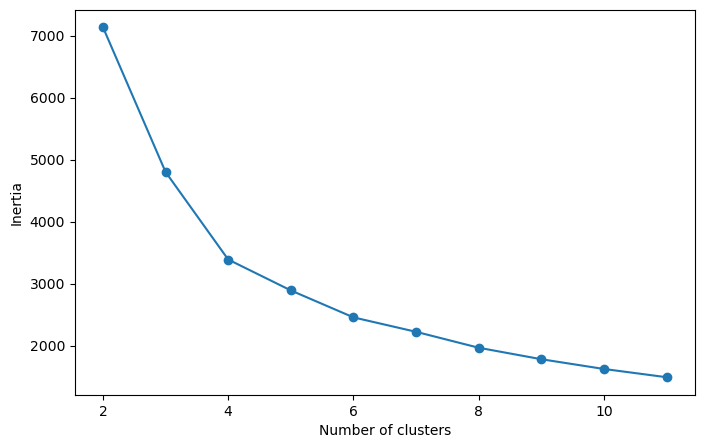

Silhouette score for 2 clusters k-means : 0.651 
Silhouette score for 3 clusters k-means : 0.071 
Silhouette score for 4 clusters k-means : 0.051 
Silhouette score for 5 clusters k-means : 0.06 
Silhouette score for 6 clusters k-means : 0.068 
Silhouette score for 7 clusters k-means : 0.092 
Silhouette score for 8 clusters k-means : 0.101 
Silhouette score for 9 clusters k-means : 0.13 
Silhouette score for 10 clusters k-means : 0.123 
Silhouette score for 11 clusters k-means : 0.13 


In [45]:
scores = []
for k in range(2,12):
    km= KMeans(n_clusters=k,random_state=123)
    km = km.fit(PCA_df)
    scores.append(km.inertia_)
dfk = pd.DataFrame({'Cluster':range(2,12), 'Score':scores})
plt.figure(figsize=(8,5))
plt.plot(dfk['Cluster'], dfk['Score'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


#
for i in range(2,12):
    kmeans_labels=KMeans(n_clusters=i,random_state=123).fit_predict(PCA_df)
    print("Silhouette score for {} clusters k-means : {} ".format(i,silhouette_score(Data,kmeans_labels, metric='euclidean').round(3)))

In [45]:
kmeans_labels=KMeans(n_clusters=10,random_state=123).fit_predict(PCA_df)

In [46]:
Updatedsensor_FinalData=sensor_FinalData.drop('duration_seconds', axis=1)

Updatedsensor_FinalData

,Start_time,End_time,Location,Type,Place
2,2011-11-28 02:27:59,2011-11-28 10:18:11,Bed,Pressure,Bedroom
3,2011-11-28 10:21:24,2011-11-28 10:21:31,Cabinet,Magnetic,Bathroom
4,2011-11-28 10:21:44,2011-11-28 10:23:31,Basin,PIR,Bathroom
5,2011-11-28 10:23:02,2011-11-28 10:23:36,Toilet,Flush,Bathroom
6,2011-11-28 10:25:44,2011-11-28 10:32:06,Shower,PIR,Bathroom
...,...,...,...,...,...
2331,2012-12-02 20:41:25,2012-12-02 20:41:34,Door,PIR,Bedroom
2332,2012-12-02 20:41:44,2012-12-02 20:41:47,Door,PIR,Living
2333,2012-12-02 21:18:10,2012-12-02 21:18:13,Door,PIR,Living
2334,2012-12-02 21:18:28,2012-12-02 21:18:31,Door,PIR,Living


Without Labels

In [47]:
#without labels
Updatedsensor_FinalData['Clusters']=list(kmeans_labels)
Updatedsensor_FinalData

,Start_time,End_time,Location,Type,Place,Clusters
2,2011-11-28 02:27:59,2011-11-28 10:18:11,Bed,Pressure,Bedroom,1
3,2011-11-28 10:21:24,2011-11-28 10:21:31,Cabinet,Magnetic,Bathroom,2
4,2011-11-28 10:21:44,2011-11-28 10:23:31,Basin,PIR,Bathroom,2
5,2011-11-28 10:23:02,2011-11-28 10:23:36,Toilet,Flush,Bathroom,3
6,2011-11-28 10:25:44,2011-11-28 10:32:06,Shower,PIR,Bathroom,2
...,...,...,...,...,...,...
2331,2012-12-02 20:41:25,2012-12-02 20:41:34,Door,PIR,Bedroom,2
2332,2012-12-02 20:41:44,2012-12-02 20:41:47,Door,PIR,Living,4
2333,2012-12-02 21:18:10,2012-12-02 21:18:13,Door,PIR,Living,4
2334,2012-12-02 21:18:28,2012-12-02 21:18:31,Door,PIR,Living,4


In [48]:
AB_ADL

,0,1,2,3,4
0,Start,time,End,time,Activity
1,--------------------,--------------------,--------,NaN,NaN
2,2011-11-28,02:27:59,2011-11-28,10:18:11,Sleeping
3,2011-11-28,10:21:24,2011-11-28,10:23:36,Toileting
4,2011-11-28,10:25:44,2011-11-28,10:33:00,Showering
...,...,...,...,...,...
490,2012-12-02,19:10:00,2012-12-02,19:11:59,Toileting
491,2012-12-02,19:16:00,2012-12-02,20:03:59,Spare_Time/TV
492,2012-12-02,20:09:00,2012-12-02,20:21:59,Spare_Time/TV
493,2012-12-02,20:29:00,2012-12-02,20:29:59,Grooming


In [49]:
AB_ADL['Start_time']= AB_ADL[0]+' '+AB_ADL[1]
AB_ADL['End_time']= AB_ADL[2]+' '+AB_ADL[3]
AB_ADL['Activity']= AB_ADL[4]


In [50]:
ADL=AB_ADL.drop([0,1,2,3,4],axis = 1)
ADL

#
ADL_Final= ADL.dropna() # Get the index of the row where column value is equal to value_to_find
ADL_Final

,Start_time,End_time,Activity
0,Start time,End time,Activity
2,2011-11-28 02:27:59,2011-11-28 10:18:11,Sleeping
3,2011-11-28 10:21:24,2011-11-28 10:23:36,Toileting
4,2011-11-28 10:25:44,2011-11-28 10:33:00,Showering
5,2011-11-28 10:34:23,2011-11-28 10:43:00,Breakfast
...,...,...,...
490,2012-12-02 19:10:00,2012-12-02 19:11:59,Toileting
491,2012-12-02 19:16:00,2012-12-02 20:03:59,Spare_Time/TV
492,2012-12-02 20:09:00,2012-12-02 20:21:59,Spare_Time/TV
493,2012-12-02 20:29:00,2012-12-02 20:29:59,Grooming


In [51]:
ADL_Final

,Start_time,End_time,Activity
0,Start time,End time,Activity
2,2011-11-28 02:27:59,2011-11-28 10:18:11,Sleeping
3,2011-11-28 10:21:24,2011-11-28 10:23:36,Toileting
4,2011-11-28 10:25:44,2011-11-28 10:33:00,Showering
5,2011-11-28 10:34:23,2011-11-28 10:43:00,Breakfast
...,...,...,...
490,2012-12-02 19:10:00,2012-12-02 19:11:59,Toileting
491,2012-12-02 19:16:00,2012-12-02 20:03:59,Spare_Time/TV
492,2012-12-02 20:09:00,2012-12-02 20:21:59,Spare_Time/TV
493,2012-12-02 20:29:00,2012-12-02 20:29:59,Grooming


In [52]:
ADL_FinalT=ADL_Final.transpose()
ADL_FinalT

,0,2,3,4,5,6,7,8,9,10,...,485,486,487,488,489,490,491,492,493,494
Start_time,Start time,2011-11-28 02:27:59,2011-11-28 10:21:24,2011-11-28 10:25:44,2011-11-28 10:34:23,2011-11-28 10:49:48,2011-11-28 10:51:41,2011-11-28 13:06:04,2011-11-28 13:09:31,2011-11-28 13:38:40,...,2012-12-02 13:37:00,2012-12-02 15:14:00,2012-12-02 16:45:00,2012-12-02 17:10:00,2012-12-02 18:46:00,2012-12-02 19:10:00,2012-12-02 19:16:00,2012-12-02 20:09:00,2012-12-02 20:29:00,2012-12-02 20:41:00
End_time,End time,2011-11-28 10:18:11,2011-11-28 10:23:36,2011-11-28 10:33:00,2011-11-28 10:43:00,2011-11-28 10:51:13,2011-11-28 13:05:07,2011-11-28 13:06:31,2011-11-28 13:29:09,2011-11-28 14:21:40,...,2012-12-02 13:59:59,2012-12-02 15:33:59,2012-12-02 16:59:59,2012-12-02 18:45:59,2012-12-02 18:47:59,2012-12-02 19:11:59,2012-12-02 20:03:59,2012-12-02 20:21:59,2012-12-02 20:29:59,2012-12-03 01:03:59
Activity,Activity,Sleeping,Toileting,Showering,Breakfast,Grooming,Spare_Time/TV,Toileting,Leaving,Spare_Time/TV,...,Leaving,Lunch,Snack,Spare_Time/TV,Toileting,Toileting,Spare_Time/TV,Spare_Time/TV,Grooming,Spare_Time/TV


In [53]:
ADL_FinalData=ADL_FinalT.drop(["0"],axis = 1)
ADL_FinalData

,2,3,4,5,6,7,8,9,10,11,...,485,486,487,488,489,490,491,492,493,494
Start_time,2011-11-28 02:27:59,2011-11-28 10:21:24,2011-11-28 10:25:44,2011-11-28 10:34:23,2011-11-28 10:49:48,2011-11-28 10:51:41,2011-11-28 13:06:04,2011-11-28 13:09:31,2011-11-28 13:38:40,2011-11-28 14:22:38,...,2012-12-02 13:37:00,2012-12-02 15:14:00,2012-12-02 16:45:00,2012-12-02 17:10:00,2012-12-02 18:46:00,2012-12-02 19:10:00,2012-12-02 19:16:00,2012-12-02 20:09:00,2012-12-02 20:29:00,2012-12-02 20:41:00
End_time,2011-11-28 10:18:11,2011-11-28 10:23:36,2011-11-28 10:33:00,2011-11-28 10:43:00,2011-11-28 10:51:13,2011-11-28 13:05:07,2011-11-28 13:06:31,2011-11-28 13:29:09,2011-11-28 14:21:40,2011-11-28 14:27:07,...,2012-12-02 13:59:59,2012-12-02 15:33:59,2012-12-02 16:59:59,2012-12-02 18:45:59,2012-12-02 18:47:59,2012-12-02 19:11:59,2012-12-02 20:03:59,2012-12-02 20:21:59,2012-12-02 20:29:59,2012-12-03 01:03:59
Activity,Sleeping,Toileting,Showering,Breakfast,Grooming,Spare_Time/TV,Toileting,Leaving,Spare_Time/TV,Toileting,...,Leaving,Lunch,Snack,Spare_Time/TV,Toileting,Toileting,Spare_Time/TV,Spare_Time/TV,Grooming,Spare_Time/TV


In [55]:
ADL_FinalDataT=ADL_FinalData.transpose()
ADL_FinalDataT

,Start_time,End_time,Activity
2,2011-11-28 02:27:59,2011-11-28 10:18:11,Sleeping
3,2011-11-28 10:21:24,2011-11-28 10:23:36,Toileting
4,2011-11-28 10:25:44,2011-11-28 10:33:00,Showering
5,2011-11-28 10:34:23,2011-11-28 10:43:00,Breakfast
6,2011-11-28 10:49:48,2011-11-28 10:51:13,Grooming
...,...,...,...
490,2012-12-02 19:10:00,2012-12-02 19:11:59,Toileting
491,2012-12-02 19:16:00,2012-12-02 20:03:59,Spare_Time/TV
492,2012-12-02 20:09:00,2012-12-02 20:21:59,Spare_Time/TV
493,2012-12-02 20:29:00,2012-12-02 20:29:59,Grooming


In [56]:
# Convert start time and end time columns to datetime objects
ADL_FinalDataT['Start_time'] = pd.to_datetime(ADL_FinalDataT['Start_time'])
ADL_FinalDataT['End_time'] = pd.to_datetime(ADL_FinalDataT['End_time'])


In [57]:
#With labels
ADL_FinalDataT

,Start_time,End_time,Activity
2,2011-11-28 02:27:59,2011-11-28 10:18:11,Sleeping
3,2011-11-28 10:21:24,2011-11-28 10:23:36,Toileting
4,2011-11-28 10:25:44,2011-11-28 10:33:00,Showering
5,2011-11-28 10:34:23,2011-11-28 10:43:00,Breakfast
6,2011-11-28 10:49:48,2011-11-28 10:51:13,Grooming
...,...,...,...
490,2012-12-02 19:10:00,2012-12-02 19:11:59,Toileting
491,2012-12-02 19:16:00,2012-12-02 20:03:59,Spare_Time/TV
492,2012-12-02 20:09:00,2012-12-02 20:21:59,Spare_Time/TV
493,2012-12-02 20:29:00,2012-12-02 20:29:59,Grooming


In [58]:
Updatedsensor_FinalData

,Start_time,End_time,Location,Type,Place,Clusters
2,2011-11-28 02:27:59,2011-11-28 10:18:11,Bed,Pressure,Bedroom,1
3,2011-11-28 10:21:24,2011-11-28 10:21:31,Cabinet,Magnetic,Bathroom,2
4,2011-11-28 10:21:44,2011-11-28 10:23:31,Basin,PIR,Bathroom,2
5,2011-11-28 10:23:02,2011-11-28 10:23:36,Toilet,Flush,Bathroom,3
6,2011-11-28 10:25:44,2011-11-28 10:32:06,Shower,PIR,Bathroom,2
...,...,...,...,...,...,...
2331,2012-12-02 20:41:25,2012-12-02 20:41:34,Door,PIR,Bedroom,2
2332,2012-12-02 20:41:44,2012-12-02 20:41:47,Door,PIR,Living,4
2333,2012-12-02 21:18:10,2012-12-02 21:18:13,Door,PIR,Living,4
2334,2012-12-02 21:18:28,2012-12-02 21:18:31,Door,PIR,Living,4


In [59]:
def find_activity (row, data2):
    for _, activity_row in data2.iterrows( ) :
        if activity_row['Start_time'] <= row['Start_time'] and activity_row['End_time'] >= row['End_time']:
            return activity_row[ 'Activity']
    return None

In [60]:
Updatedsensor_FinalData['Activity'] = Updatedsensor_FinalData.apply(lambda row: find_activity(row, ADL_FinalDataT), axis=1)


In [61]:
Updatedsensor_FinalData

,Start_time,End_time,Location,Type,Place,Clusters,Activity
2,2011-11-28 02:27:59,2011-11-28 10:18:11,Bed,Pressure,Bedroom,1,Sleeping
3,2011-11-28 10:21:24,2011-11-28 10:21:31,Cabinet,Magnetic,Bathroom,2,Toileting
4,2011-11-28 10:21:44,2011-11-28 10:23:31,Basin,PIR,Bathroom,2,Toileting
5,2011-11-28 10:23:02,2011-11-28 10:23:36,Toilet,Flush,Bathroom,3,Toileting
6,2011-11-28 10:25:44,2011-11-28 10:32:06,Shower,PIR,Bathroom,2,Showering
...,...,...,...,...,...,...,...
2331,2012-12-02 20:41:25,2012-12-02 20:41:34,Door,PIR,Bedroom,2,Spare_Time/TV
2332,2012-12-02 20:41:44,2012-12-02 20:41:47,Door,PIR,Living,4,Spare_Time/TV
2333,2012-12-02 21:18:10,2012-12-02 21:18:13,Door,PIR,Living,4,Spare_Time/TV
2334,2012-12-02 21:18:28,2012-12-02 21:18:31,Door,PIR,Living,4,Spare_Time/TV


In [66]:
Updatedsensor_FinalData.dropna(subset=['Activity'],inplace=True)

In [67]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
true_labels = le.fit_transform(Updatedsensor_FinalData['Activity'])
predicted_labels = Updatedsensor_FinalData["Clusters"]

# Create the confusion matrix
confusion_matrix = pd.crosstab(true_labels, predicted_labels, rownames=['True'], colnames=['Predicted'])
print(confusion_matrix)

Predicted   0   1    2   3    4   5   6   7   8   9
True                                               
0           4   0   77   4   44  49   0   7   5   0
1           0   0   21   0   23  17   0   0   1   0
2           8   0   84  12   52  46   0  10  10   0
3           0   0   86   0   29  18   0   0   0   0
4           1   0   71   0   61  39   0   6   4   0
5           1   0    4   5    2   6   0   5   1   0
6           2  15   22   1   19  10  16   1   2   2
7           0   0   85   1   41  46   0   1   1   0
8          22   1  144  35  184  89   0  19  18  31
9           1   0   68   4   31  39   0   4   3   0


In [68]:
print("Activity Labels:")
for i, activity in enumerate(le.classes_):
    print(f"{activity} -> {i}")

Activity Labels:
Breakfast -> 0
Dinner -> 1
Grooming -> 2
Leaving -> 3
Lunch -> 4
Showering -> 5
Sleeping -> 6
Snack -> 7
Spare_Time/TV -> 8
Toileting -> 9


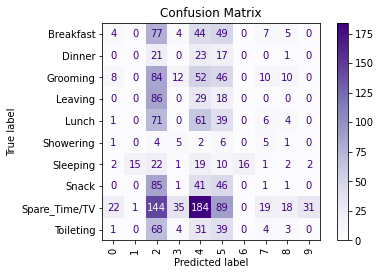

In [71]:
from sklearn.metrics import ConfusionMatrixDisplay

contingency_table = pd.crosstab(Updatedsensor_FinalData['Activity'], predicted_labels)
confusion_matrix = contingency_table.to_numpy()

activity_labels = sorted(Updatedsensor_FinalData['Activity'].unique())
cluster_labels = sorted(Updatedsensor_FinalData['Clusters'].unique())

# Plot the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=activity_labels)
disp.plot(cmap='Purples', xticks_rotation='vertical', values_format='d')

# Set the x-tick labels to match the cluster labels
plt.xticks(np.arange(len(cluster_labels)), cluster_labels)

plt.title("Confusion Matrix")
plt.show()

In [73]:
final_accuracy=accuracy = confusion_matrix.max(axis=0).sum()/len(Updatedsensor_FinalData)
print(final_accuracy)

0.3235460191981931
